In [1]:
# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [3]:
#pip install plotly   

# Importing Dataset

In [4]:
dataset=pd.read_csv("Zomato_Mumbai_Dataset.csv.",delimiter='|')

In [5]:
dataset.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# Getting basic information about the Dataset

In [6]:
dataset.shape

(15081, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [8]:
dataset.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


# Cleaning the dataset

# a.Removing the redundant rows of data

In [9]:
# Checking redundant rows from data
wrong_data = dataset['PAGE NO'] == 'PAGE NO'
dataset[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [10]:
# rows other than the above are taken from the dataframe and stored them to the dataframe
# This step will remove the wrong data from the dataframe
dataset=dataset[~wrong_data]
dataset

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...,...,...,...
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Mumbai,Kandivali West,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Mumbai,Kandivali West,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15079,Mandarin Panda,400,"Desserts,Chinese,Thai",Mumbai,Malad West,https://www.zomato.com/mumbai/mandarin-panda-m...,99,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


In [11]:
# Dropping the columns which are not required for our analysis
dataset.drop(['URL','PAGE NO', 'CITY'], axis=1, inplace=True)


In [12]:
dataset.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# b.Removing the rows have null values

In [13]:
# Checking for Null records
dataset.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [14]:
# checking for a null row(price)
dataset[dataset["PRICE"].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Dropping the above row from the dataset
dataset=dataset.drop(labels=15080,axis=0)

In [16]:
# Replacing the Other null records with NA
dataset.fillna("NA", inplace=True)

In [17]:
# Checking for null records once again
dataset.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

# Converting data type of Numerical column(Rating) from object to numeric type

In [18]:
# Checking for the text values available in Rating column
dataset["RATING"].value_counts()


RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
4.8           4
2.2           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [19]:
# Replacing the text values(New, Opening,'-') with "0"
dataset["RATING"].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

C:\Users\Inst_\AppData\Local\Temp\ipykernel_27600\3057263283.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [20]:
# checking if the text values got replaced with "0"
dataset["RATING"].value_counts()

RATING
0      3370
3.5    1094
3.4    1036
3.6     960
3.3     926
3.7     917
3.2     801
3.8     782
3.1     734
3.0     622
3.9     596
2.9     409
4.0     408
2.8     309
4.1     298
4.2     199
2.7     170
4.3     148
4.4      99
2.6      77
4.5      46
2.5      39
4.6      32
2.4      26
4.7      13
2.3      10
2.1       5
4.8       4
2.2       4
4.9       2
1.8       1
2.0       1
Name: count, dtype: int64

In [21]:
# Checking for text values in VOTES column before converting it to numeric data type
dataset["VOTES"].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
2797       1
1876       1
2092       1
3191       1
3529       1
Name: count, Length: 1123, dtype: int64

In [22]:
# Replacing the text values with "0"
dataset.replace({"VOTES": ['NEW', '-', 'Opening']}, 0, inplace=True)

# above code is replaced for this line of code : dataset["VOTES"].replace(to_replace["NEW","-","Opening"],value='0',inplace=True)

In [23]:
dataset["VOTES"].value_counts()

VOTES
0       3370
4        364
5        320
6        288
7        277
        ... 
878        1
1306       1
268        1
1848       1
602        1
Name: count, Length: 1121, dtype: int64

In [24]:
# Changing the datatype of the numerical columns 
dataset["PRICE"]=dataset["PRICE"].astype('int64')
dataset["RATING"] =dataset["RATING"].astype('float64')
dataset["VOTES"]=dataset["VOTES"].astype('int64')

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


# d. Working with Timing Column

In [26]:
# In timing Column, we have time and days combined as single value as shown below
dataset["TIMING"].value_counts()

TIMING
11am to 11pm(Mon-Sun)                            1192
11am to 12midnight(Mon-Sun)                       632
12noon to 12midnight(Mon-Sun)                     467
11am to 1130pm(Mon-Sun)                           309
10am to 10pm(Mon-Sun)                             267
                                                 ... 
11am to 3pm,430pm to 11pm(Mon-Sun)                  1
1230pm to 330pm,530pm to 1130pm(Mon-Sun)            1
630pm to 1130pm(Mon),11am to 3pm,630pm to ...       1
Closed(Mon),1030am to 330pm,630pm to 11pm...        1
8am to 11am,12noon to 3pm,730pm to 1130pm...        1
Name: count, Length: 2551, dtype: int64

In [27]:
# Splitting the value and storing it in temporary dataframe
temp_df = dataset["TIMING"].str.split("(",n=1,expand=True)
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [28]:
# Assigning the splitted values back to dataframe, by adding a new column days_open
dataset["TIMING"]=temp_df[0]
dataset["DAYS_OPEN"]=temp_df[1]
dataset.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun)


In [29]:
# Removing the bracket from the days_open column
dataset['DAYS_OPEN']=dataset['DAYS_OPEN'].str.replace(r'[)]','',regex=True)
dataset.head() 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun


In [30]:
# Checking for null records in Days_Open column
dataset.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [31]:
# Replacing the Null values with "NA"
dataset.fillna("NA", inplace=True)

In [32]:
# Checking info of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


# e. Removing those restaurant whose has 0 rating or votes

In [33]:
# Finding those restaurant whose has 0 Rating or Votes
useless_data = (dataset['RATING'] == 0.0) | (dataset['VOTES'] == 0)
dataset[useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0.0,0,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0.0,0,Mon-Sun


In [34]:
# Removing the useless dataset which has rating type and vote as zero and storing the correct data back to the dataframe
# This will permanently remove the wrong data from the dataframe
dataset=dataset[~useless_data]


# f.Working on Rating type Column

In [35]:
# Checking if the unique values in the column

dataset["RATING_TYPE"].value_counts()

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
İyi                 2
Buono               2
Bom                 2
Muito Bom           2
Promedio            2
Dobré               2
Priemer             2
Průměr              2
Ortalama            2
Bueno               2
Excelente           1
Velmi dobré         1
Baik                1
Çok iyi             1
Skvělé              1
Média               1
Sangat Baik         1
Biasa               1
Muy Bueno           1
Media               1
Name: count, dtype: int64

In [36]:
# Translating the texts into proper English
dataset.replace({'RATING_TYPE':'Excelente'},'Excellent',inplace=True)
dataset.replace({'RATING_TYPE':['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré']},'Very Good',inplace=True)
dataset.replace({'RATING_TYPE':['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé']},'Good',inplace=True)
dataset.replace({'RATING_TYPE':['Priemer','Média','Çok iyi']},'Average',inplace=True)
dataset.replace({'RATING_TYPE':['Průměr','Promedio','Ortalama','Muito Bom','İyi']},'Poor',inplace=True)
dataset.replace({'RATING_TYPE':['Baik','Biasa','Media','Sangat Baik']},'Very Poor',inplace=True)

In [37]:
# checking all values are correctly mapped
dataset["RATING_TYPE"].value_counts()


RATING_TYPE
Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

# g. Working on Region Column

In [38]:
dataset["REGION"].value_counts()

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Little World Mall-- Kharghar           1
Le Sutra Hotel-- Khar                  1
Maxus Mall-- Bhayandar                 1
Orchard Mall-- Goregaon East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [39]:
# Removing the irrelevent text from the Region column
dataset["REGION"]=dataset["REGION"].str.replace('[a-zA-z].+--','',regex=True)

In [40]:
# Removing the west and east from the column
dataset["REGION"]=dataset["REGION"].str.replace('West|west|East|east','',regex=True)

In [41]:
dataset["REGION"].value_counts()

REGION
 Thane         712
 Andheri       409
Mira Road      405
Malad          370
Kandivali      361
              ... 
 Ulhasnagar      1
 Parel           1
 Goregaon        1
 Dadar           1
 Bhayandar       1
Name: count, Length: 148, dtype: int64

In [42]:
dataset['REGION'] = dataset['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Andheri',regex=True)
dataset['REGION'] =dataset['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
dataset['REGION'] =dataset['REGION'].str.replace('Runwal Green','Mulund',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Kamothe','Sion',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

# h. Removing Duplicate records

In [43]:
# Finding all the duplicate rows
dataset[dataset.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [44]:
# dropping all the duplicate rows
dataset=dataset.drop_duplicates()

# 4.Copying the cleaned data into new DataFrame

In [45]:
zomato_df = dataset.copy()

In [46]:
zomato_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


# 5.Performing Exploratory Data Analysis

# Q1) How many restaurants are in Mumbai for each type of cuisine?

In [47]:
Count_cusinetype = zomato_df['CUSINE TYPE'].value_counts().reset_index()
Count_cusinetype.rename(columns={'CUSINE TYPE':'CUSINE_TYPE','count':'COUNT OF RESTAURANTS'}, inplace=True)
Count_cusinetype

,CUSINE_TYPE,COUNT OF RESTAURANTS
0,Casual Dining,4107
1,Quick Bites,3540
2,none,1127
3,Bakery,537
4,Dessert Parlor,431
5,Café,320
6,Sweet Shop,123
7,Beverage Shop,91
8,Food Court,50
9,Bar,47


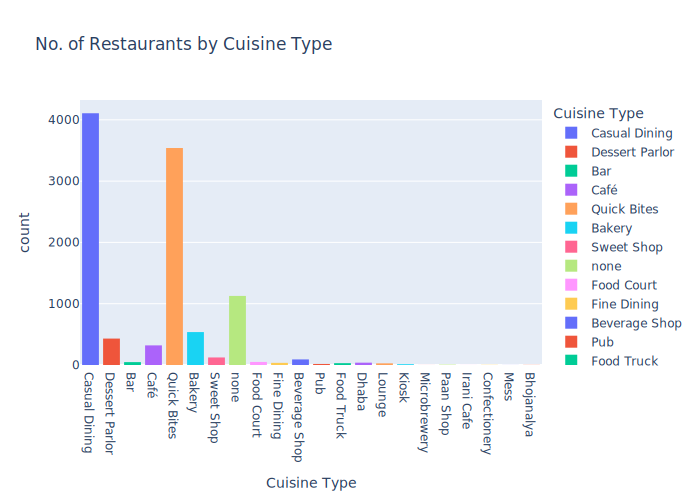

In [48]:
fig=px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',
                 title = 'No. of Restaurants by Cuisine Type', 
                 labels = {'CUSINE TYPE': 'Cuisine Type'})
fig.show()

In [49]:
#pip install --upgrade kaleido

# Q2) What are the percentage of restaurants by Rating Type in Mumbai?

In [50]:
rating_type_df=zomato_df["RATING_TYPE"].value_counts().reset_index()
rating_type_df.rename(columns={'count':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,RATING_TYPE,COUNT OF RESTAURANTS
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


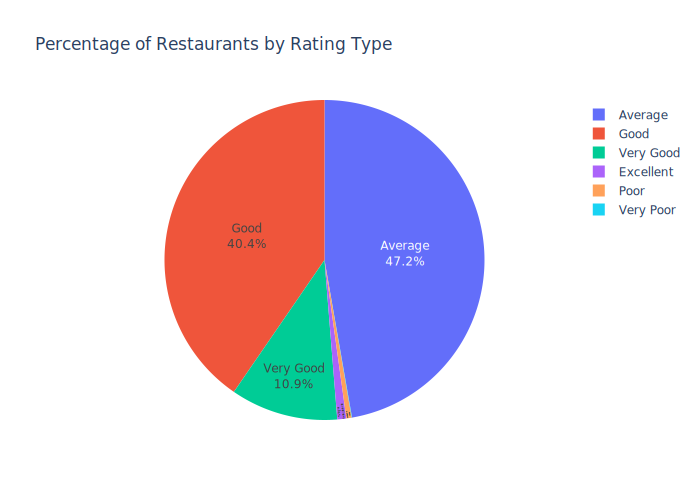

In [51]:
fig = px.pie(rating_type_df, names='RATING_TYPE', values='COUNT OF RESTAURANTS', color='RATING_TYPE',
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Q3) which are the top 10 highest rated Seafood Restaurant in Mumbai?

In [52]:
seafood_df=zomato_df[zomato_df["CUSINE_CATEGORY"].str.contains("Seafood")]
seafood_df.sort_values(by='RATING',ascending=False).head(10)


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am",Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,12noon to 1am,Excellent,4.5,100,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,"12noon to 330pm,7pm to 1am",Excellent,4.5,573,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM",Excellent,4.5,497,Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,"12noon to 6pm,7pm to 12midnight",Excellent,4.5,2068,Mon-Sun
903,Ferry Wharf,1500,"Seafood,Mangalorean",Bandra,Casual Dining,"11am to 330pm,7pm to 1230AM",Very Good,4.4,459,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane,Casual Dining,"1130am to 330pm,6pm to 1130pm",Very Good,4.4,662,Mon-Sun


# Q4) Which is the best food truck in Mumbai?

In [53]:
foodtruck_df=zomato_df[zomato_df['CUSINE TYPE'] == 'Food Truck']
foodtruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun


# Q5) Which places have the highest rated restaurant for each Cuisine type in Mumbai?

In [54]:
# Assuming Restaurants having rating greater than 4.5
highest_rated_df = zomato_df[zomato_df["RATING"] >= 4.5]
highest_rated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,12noon to 1am,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,"11am to 330pm,7pm to 1130pm",Excellent,4.5,1302,"Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,Closed,Excellent,4.6,492,"Mon,12noon to 11pm(Tue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,"1130am to 330pm,7pm to 1130pm",Excellent,4.5,754,Mon-Sun


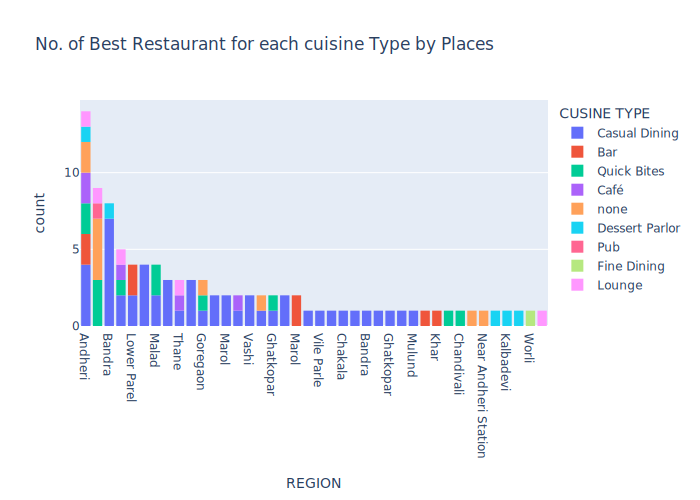

In [55]:
fig = px.histogram(highest_rated_df, x='REGION', color = 'CUSINE TYPE',
     title = 'No. of Best Restaurant for each cuisine Type by Places').update_xaxes(categoryorder='total descending')
fig.show()
                   

In [56]:
highest_rated_df["REGION"].value_counts()

REGION
 Andheri                 14
Powai                     9
 Bandra                   8
Borivali                  5
 Thane                    4
Lower Parel               4
Malad                     4
Chembur                   3
Thane                     3
Kharghar                  3
Goregaon                  3
Juhu                      2
CBD Belapur               2
 Bandra                   2
Marol                     2
Vashi                     2
Ghatkopar                 2
 Marol                    2
Andheri                   2
Dadar                     1
Santacruz                 1
 Powai                    1
Bhayandar                 1
Vile Parle                1
Near Andheri  Station     1
Chakala                   1
Dahisar                   1
Navi Mumbai               1
Kalbadevi                 1
 Worli                    1
Byculla                   1
Mohammad Ali Road         1
Chandivali                1
Khar                      1
Bandra                    1
Fort         

# Q6) What is the Avg Price Distribution of highest rated restaurant for each Cuisine Type in Mumbai?

In [57]:
highest_rated_price_df = highest_rated_df.groupby(by=['REGION', 'CUSINE TYPE'])['PRICE'].mean().reset_index()
highest_rated_price_df.head()

,REGION,CUSINE TYPE,PRICE
0,Andheri,Casual Dining,1000.0
1,Andheri,Bar,1600.0
2,Andheri,Café,800.0
3,Andheri,Casual Dining,1212.5
4,Andheri,Dessert Parlor,300.0


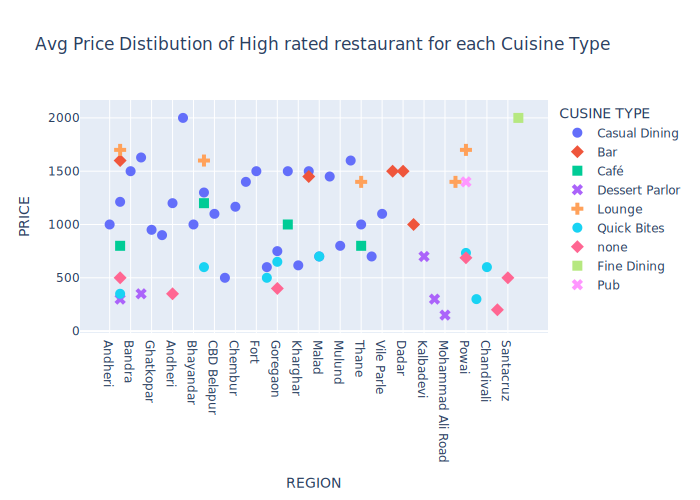

In [58]:
fig = px.scatter(highest_rated_price_df, x="REGION", y="PRICE", color="CUSINE TYPE", symbol="CUSINE TYPE",
title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

# Q7) Which areas have a large number of Chinese Restaurant market?

In [59]:
Chinese_df=zomato_df[zomato_df["CUSINE_CATEGORY"].str.contains('Chinese')]
Chinese_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am,Very Good,4.2,2042,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am,Average,2.6,36,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am",Average,3.3,13,Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun


In [60]:
Chinese_rest_df=Chinese_df.groupby(by='REGION').agg({'NAME':'count', 'PRICE':'mean'}).rename(columns={'NAME':'COUNT OF RESTAURANTS'}).reset_index()
Chinese_rest_df=Chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending = False).head(25)
Chinese_rest_df.head()

,REGION,COUNT OF RESTAURANTS,PRICE
36,Thane,341,589.017595
95,Mira Road,220,545.681818
89,Malad,185,599.189189
71,Goregaon,160,540.937500
65,Dombivali,158,539.259494


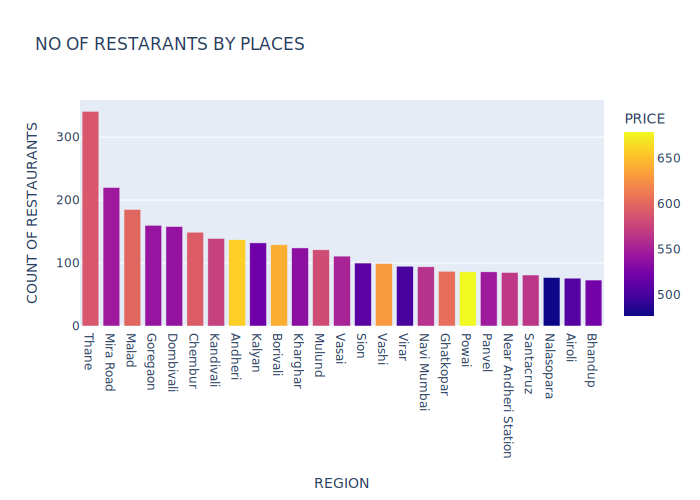

In [61]:
fig = px.bar(Chinese_rest_df, x='REGION', y='COUNT OF RESTAURANTS', color='PRICE', title = 'NO OF RESTARANTS BY PLACES')
fig.show()

# Q8) Is there a relation between price and rating by each Cusine Type

In [62]:
price_rating_df=zomato_df.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()
price_rating_df

,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


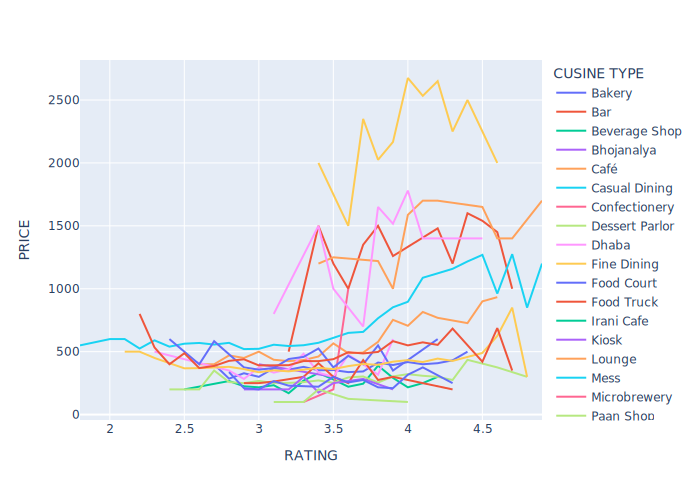

In [63]:
fig = px.line(price_rating_df, x='RATING', y='PRICE', color='CUSINE TYPE')
fig.show()

In [64]:
# Q9) Is there a relation between Region and Price
region_price_df=zomato_df.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price_df

,REGION,PRICE
0,Andheri,1250.000000
1,Andheri,590.049383
2,Bandra,1675.000000
3,Bandra,718.273381
4,Bhayandar,150.000000
...,...,...
130,Vikhroli,480.434783
131,Vile Parle,464.457831
132,Virar,452.027027
133,Wadala,427.500000


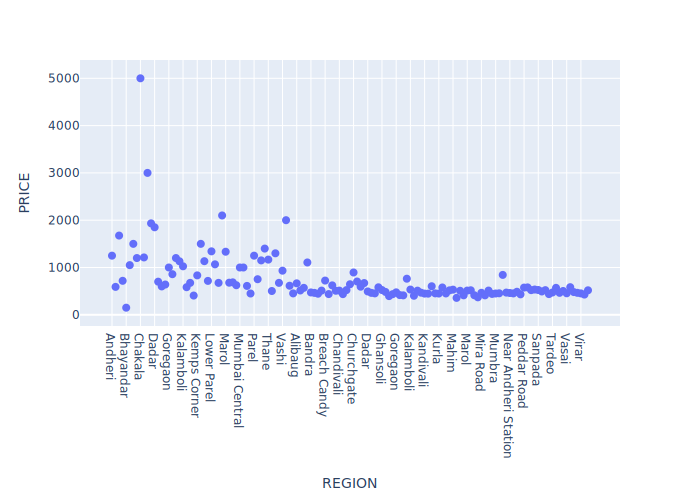

In [65]:
fig=px.scatter(region_price_df, x='REGION', y='PRICE').update_traces(marker_size=8)
fig.show()

# Q10) Find the list of affordable restaurants?


### The Criteria for affordable restaurants would be:-
### 1) Low price 2)High Rated
### First step is to find the restaurants with average cost of 1/4th the average cost of the most expensive restaurant in our dataframe
### i.e. most expensive restaurant has an average meal cost = 6000. we will try to stay economical and only pick the restaurants that are 1/4th of 6000


In [66]:
max_price = zomato_df['PRICE'].max()
one_fourth_price=max_price/4
one_fourth_price

np.float64(1250.0)

In [67]:
# Finding the restaurants that have price less than and equal to 1/4 th of the max price i.e. finding cheap restaurants
aff_rest_df=zomato_df[['NAME','PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
aff_rest_df=aff_rest_df[aff_rest_df['PRICE']<=1250]
aff_rest_df.sort_values(by='PRICE', inplace=True)
aff_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
6137,Sanjog Wine N Dine,5,"North Indian,Chinese",Thane,Casual Dining
9598,Ho5 Store,50,Fast Food,Matunga,none
2925,Jab We Eat,50,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum,none
11239,Cakewaali.co,100,Bakery,Navi Mumbai,Bakery
6390,Kamath's Ice Cream,100,"Desserts,Ice Cream",Andheri,Dessert Parlor
...,...,...,...,...,...
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining
6941,90ML Bar & Kitchen,1200,"Continental,Asian,North Indian",Bandra,Casual Dining
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250,Desserts,Parel,Dessert Parlor
7301,SamBar Pub & Kitchen,1250,"Finger Food,South Indian,North Indian",Khar,Pub


In [70]:
# Find the highest rated restaurants
highest_rest_df= zomato_df[['NAME','PRICE','CUSINE_CATEGORY','REGION','CUSINE TYPE', 'RATING']]
highest_rest_df=highest_rest_df[highest_rest_df['RATING']>=4.5]
highest_rest_df.sort_values(by='PRICE', inplace=True)
highest_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
807,Moussestruck,200,Desserts,Near Andheri Station,none,4.5
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites,4.5
14234,Cone Culture,250,European,Kharghar,Casual Dining,4.6
725,Belo Pops,300,"Ice Cream,Desserts,Beverages",Andheri,none,4.5
...,...,...,...,...,...,...
8887,Drifters Tap Station,2000,"North Indian,Continental,European,American",Bandra,Casual Dining,4.5
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,4.6
5335,Mia Cucina,2000,Italian,Bandra,Casual Dining,4.5
12625,House of Mandarin,2100,"Chinese,Sushi,Asian",Bandra,Casual Dining,4.5


### Now merge the aff_rest_df and highest_rest_df to obtain the intersection i.e. the list of Affordable restaurants

In [87]:
highrate_aff_df = pd.merge(aff_rest_df,highest_rest_df,how='inner', on = ['NAME','REGION'])
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x','CUSINE_CATEGORY_x','REGION','CUSINE TYPE_x']]
# Taking price, cusine_category, cusine type from one of the df i.e. aff_rest_df as both x and y columns have the same value
highrate_aff_df.rename(columns={'NAME':'NAME','PRICE_x':'PRICE','CUSINE_CATEGORY_x':'CUSINE_CATEGORY', 'REGION':'REGION',
                               'CUSINE TYPE_x': 'CUSINE TYPE'}, inplace=True)


In [88]:
# Affordable Restaurants with low price and high rating
highrate_aff_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor
1,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites
2,Moussestruck,200,Desserts,Near Andheri Station,none
3,Cone Culture,250,European,Kharghar,Casual Dining
4,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor
...,...,...,...,...,...
60,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
61,Spice Republic,1200,"Cafe,Continental,Mediterranean,Mexican,Italian...",Borivali,Café
62,Culinary Tales,1200,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri,Casual Dining
63,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining


# Q10) Find the list of most Reliable Restaurants?

#### The criteria for most reliable restaurants would be:-
#### 1)Low Price 2)High rated 3)Large no of votes
#### First step will be to find the restaurants with Votes greater than Mean of Votes 

In [91]:
mean_votes = zomato_df['VOTES'].mean()
mean_votes

np.float64(177.2656679624538)

In [93]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df=zomato_df[['NAME','PRICE','CUSINE_CATEGORY','REGION','CUSINE TYPE','VOTES']]
mean_rest_df = mean_rest_df[mean_rest_df['VOTES'] > 177]
mean_rest_df.sort_values(by='VOTES', inplace=True)
mean_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,VOTES
12267,Buddha Bowl,1000,"Asian,Healthy Food",Bandra,none,178
4194,Sai Sagar Veg Treat,500,"North Indian,South Indian,Chinese,Fast Food,Be...",Kalyan,Casual Dining,178
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,178
11211,Soul Curry,800,"Chinese,North Indian,Malwani,Mughlai,Biryani",Bhandup,Casual Dining,178
3828,Frozen Delight -The Dessert Cafe,250,"Desserts,Ice Cream",Airoli,Dessert Parlor,178
...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,1600,"American,Chinese,Mughlai,Italian",Colaba,Casual Dining,7327
1251,Joey's Pizza,800,Pizza,Malad,Quick Bites,7350
5337,Chili's American Grill & Bar,1400,"American,Mexican,Burger,Tex-Mex",Powai,Casual Dining,7377
3751,Prithvi Cafe,700,"Cafe,Fast Food",Juhu,Café,8000


## These are the most reliable, highest rated and affordable restaurants:-
### We obtain this dataframe by simply taking the intersection of highrate_aff_df & mean_rest_df
### The dataframe obtained below shows the restaurants whose:
* Cost is below 1250
* Rating is above 4.5
* Votings are above 177

In [94]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME','REGION'])
reliable_rest_df = reliable_rest_df[['NAME','PRICE_x','CUSINE_CATEGORY_x','REGION','CUSINE TYPE_x']]
reliable_rest_df.rename(columns={'NAME':'NAME','PRICE_x':'PRICE','CUSINE_CATEGORY_x':'CUSINE_CATEGORY','REGION':'REGION',
                                  'CUSINE TYPE_x':'CUSINE TYPE'}, inplace=True)

In [95]:
reliable_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining
1,Fresh Food Co.,500,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz,none
2,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor
3,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
4,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining
5,Regano's,600,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining
6,Big Bang Cuurry,350,"North Indian,Biryani,Rolls",Andheri,none
7,Sandy's Den,1000,"Fast Food,Bar Food",Chembur,Casual Dining
8,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining
9,Maezo,1000,Modern Indian,Thane,Casual Dining
